 pandas.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)[source]¶

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from smithplot import SmithAxes
%matplotlib inline

In [11]:
# filenames = [
#     'VNA_171024_104048_with sample 2.xls',
#     'VNA_171024_103542_with chip 2.xls',
#     'VNA_171024_095736_with sample.xls',
#     'VNA_171024_094920_with U-chip.xls',
#     'VNA_171024_093152_bare IDT.xls'
# ]
# #dfs = [pd.read_excel('/media/windows-share/sawdx/' + filename) for filename in filenames]
# dfs = [pd.read_excel(r'C:\Temp\Sparams\\' + filename) for filename in filenames]

# filenames = [
#     'VNA_171024_093152_bare IDT.xls',
#     'VNA_171024_094920_with U-chip.xls',
#     'VNA_171024_095736_with sample.xls',
#     'VNA_171024_103542_with chip 2.xls',
#     'VNA_171024_104048_with sample 2.xls',
# ]
# #dfs = [pd.read_excel('/media/windows-share/sawdx/' + filename) for filename in filenames]
# dfs = [pd.read_excel(r'C:\Temp\sawdx\Network Analyser\\' + filename) for filename in filenames]


filenames = [
    '7MHz_IDT_12-16MHz_VNA_171213_153445.csv',
    '7MHz_IDT_16-18MHz_VNA_171213_153445.csv',
    '7MHz_IDT_5-18MHz_VNA_171213_153445.csv',
    '7MHz_IDT_5-8MHz_VNA_171213_153445.csv',
    '7MHz_IDT_8-12MHz_VNA_171213_153445.csv',
]
dfs = [pd.read_csv(r'C:\Temp\sawdx\Network Analyser\7MHzIDT\\' + filename) for filename in filenames]

# filenames = [
#     'VNA_171130_092821_15-18MHz.xls',
# ]
#dfs = [pd.read_excel(r'C:\Temp\sawdx\Network Analyser\15-18MHz Data\\' + filename) for filename in filenames]



In [33]:
len(dfs)
mapping = zip(
    ['Frequency(Hz)', 'Return Loss(dB)', 'Phase(deg)', 'Rs', 'Xs', '|Z|', ],
    ['Frequency (Hz)', 'Returnloss (dB)', 'Returnphase (°)', 'Rs (Ohm)', 'Xs (Ohm)', '|Z| (Ohm)', ]
)
new_names = { a:b for (a,b) in mapping}
for df in dfs:
    df.rename(columns=new_names, inplace=True)
new_names

{'Frequency(Hz)': 'Frequency (Hz)',
 'Phase(deg)': 'Returnphase (°)',
 'Return Loss(dB)': 'Returnloss (dB)',
 'Rs': 'Rs (Ohm)',
 'Xs': 'Xs (Ohm)',
 '|Z|': '|Z| (Ohm)'}

In [34]:
dfs[0].columns

Index(['Frequency (Hz)', 'Returnloss (dB)', 'Returnphase (°)', 'Rs (Ohm)',
       'SWR', 'Xs (Ohm)', '|Z| (Ohm)', 'Theta'],
      dtype='object')

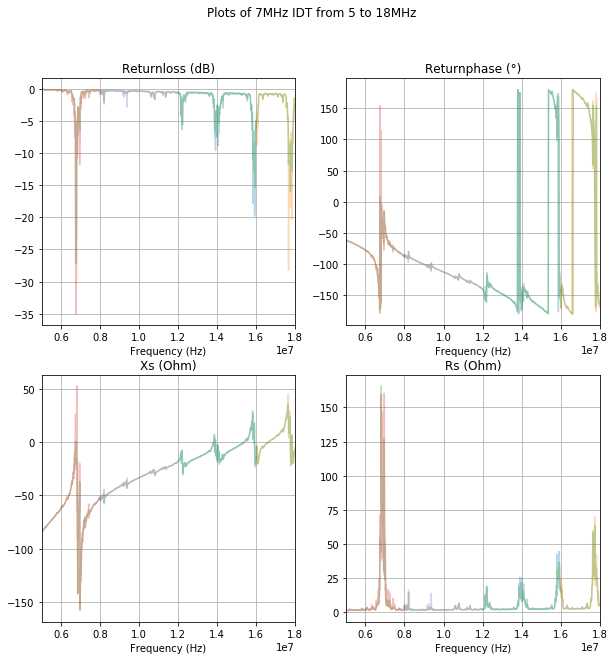

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1 = dfs[0].plot('Frequency (Hz)', 'Returnloss (dB)', grid=True, kind='line', alpha=0.3,  ax=axes[0,0])
                #xlim=(1.5e7, 1.8e7))  #, figsize=(7,7));
ax2 = dfs[0].plot('Frequency (Hz)', 'Returnphase (°)', grid=True, kind='line', alpha=0.3, ax=axes[0,1]);
ax3 = dfs[0].plot('Frequency (Hz)', 'Xs (Ohm)', grid=True, kind='line', alpha=0.3, ax=axes[1,0]);
ax4 = dfs[0].plot('Frequency (Hz)', 'Rs (Ohm)', grid=True, kind='line', alpha=0.3, ax=axes[1,1]);

for df in dfs[1:] :
    df.plot('Frequency (Hz)', 'Returnloss (dB)', grid=True, alpha=0.3, ax=ax1)
    df.plot('Frequency (Hz)', 'Returnphase (°)', grid=True, kind='line', alpha=0.3, ax=ax2);
    df.plot('Frequency (Hz)', 'Xs (Ohm)', grid=True, kind='line', alpha=0.3, ax=ax3);
    df.plot('Frequency (Hz)', 'Rs (Ohm)', grid=True, kind='line', alpha=0.3, ax=ax4);

titles = zip((ax1, ax2, ax3, ax4), ('Returnloss (dB)', 'Returnphase (°)', 'Xs (Ohm)', 'Rs (Ohm)') )
for ax, txt in titles:
    ax.set_title(txt);
    #ax.title.set_texte = 'fred';

for ax in (ax4, ):  #ax1, ax2, ax3, ax4):
    ax.legend(filenames);
for ax in (ax1, ax2, ax3, ax4):
    ax.legend().set_visible(False);
    
fig.suptitle('Plots of 7MHz IDT from 5 to 18MHz')
plt.savefig('c:/Temp/sawdx/Plots of 7MHz IDT from 5 to 18MHz.jpg')

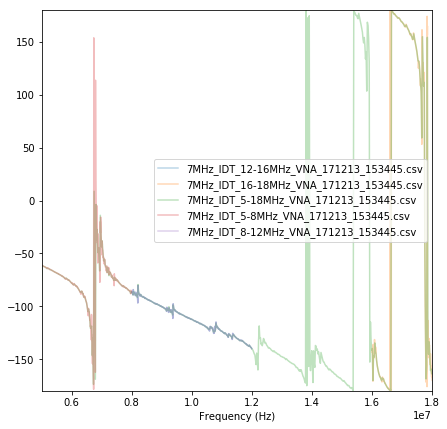

In [45]:
ax1 =  df.plot('Frequency (Hz)', 'Returnphase (°)', grid=True, kind='line',
               xlim=(1.6e7, 1.7e7), ylim=(-180, 180), figsize=(7,7),
               alpha=0.3,)# marker='o',);

for df in dfs[1:] :
    df.plot('Frequency (Hz)', 'Returnphase (°)', alpha=0.3, ax=ax1)

ax1.legend(filenames);

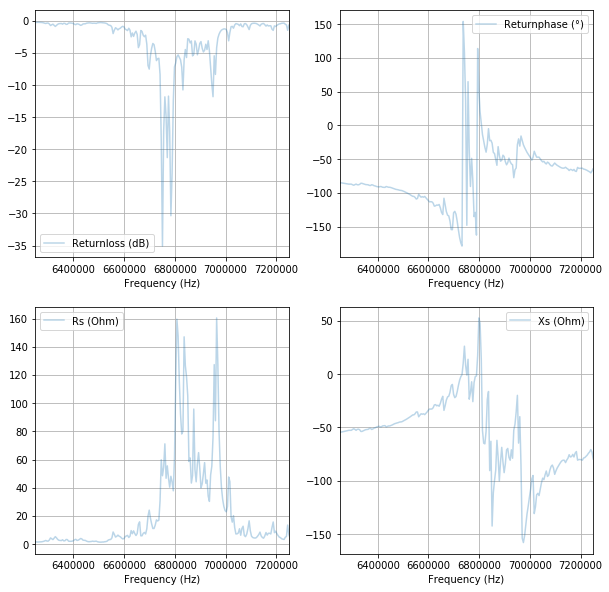

In [94]:
df7 = dfs[3]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
kwargs = {'grid':True, 'kind':'line', 'alpha':0.3, 'xlim':(6.25e6, 7.25e6)}
ax1 = df7.plot('Frequency (Hz)', 'Returnloss (dB)', **kwargs,  ax=axes[0,0],);
                #xlim=(6e6, 7.5e6))  #, figsize=(7,7));
ax2 = df7.plot('Frequency (Hz)', 'Returnphase (°)', **kwargs, ax=axes[0,1]);
ax3 = df7.plot('Frequency (Hz)', 'Xs (Ohm)', **kwargs, ax=axes[1,1]);
ax4 = df7.plot('Frequency (Hz)', 'Rs (Ohm)', **kwargs, ax=axes[1,0]);
plt.savefig('c:/Temp/sawdx/Plots of 7MHz IDT 6.25 to 7.25MHz.jpg')

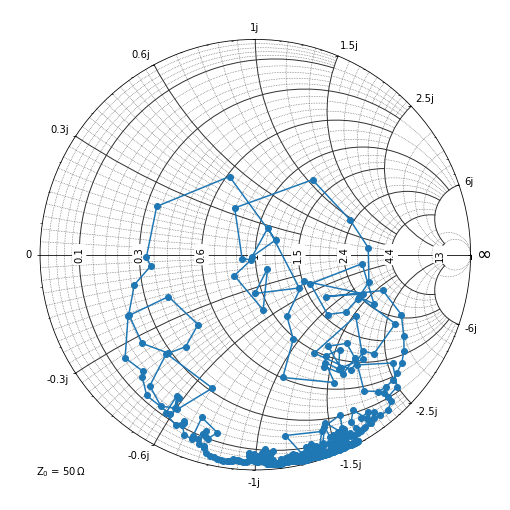

In [100]:
plt.figure(figsize=(9, 9))
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(df7['Rs (Ohm)'], df7['Xs (Ohm)'], datatype=SmithAxes.Z_PARAMETER);
plt.savefig('c:/Temp/sawdx/Smith of 7MHz IDT from 5 to 8MHz.jpg')

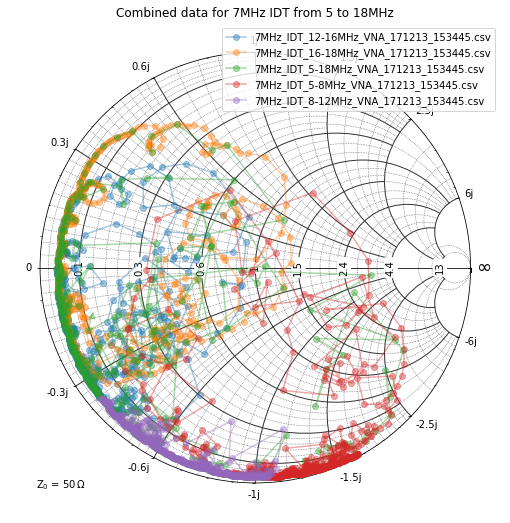

In [54]:
plt.figure(figsize=(9, 9))

for df in dfs:
    df['rho'] = 10**(df['Returnloss (dB)']/20)
    df['phase (rads)'] = np.pi * df['Returnphase (°)'] / 180
    df['s11'] = df['rho'] * np.exp(1j * df['phase (rads)'])
    #df['phase_offsets'] = df['Frequency (Hz)'] * 2 * np.pi * time_offset_15e6
    #df['s11_offset'] = df['rho'] * np.exp(1j * (df['phase (rads)'] + df['phase_offsets']))
    ax = plt.subplot(1, 1, 1, projection='smith')
    plt.plot(df['s11'], datatype=SmithAxes.S_PARAMETER, alpha=0.4);
    #plt.plot(df['s11_offset'], datatype=SmithAxes.S_PARAMETER);
    #plt.savefig('c:/Temp/sawdx/Smith of all.jpg')
    plt.title('Combined data for 7MHz IDT from 5 to 18MHz')
    ax.legend(filenames);
    plt.savefig('c:/Temp/sawdx/Smith of 7MHz from 5 to 18MHz.jpg')

In [39]:
#df['offset_phase (deg)'] = 0 * (df['phase (rads)'] - df['phase_offsets']) * 180 / np.pi
#df['offset_phase (deg)']
#df['phase_offsets']

df=dfs[1]
df[df['Xs (Ohm)'] > -1]

below_target = df['Xs (Ohm)'] < -0.6 * 50
above_target = df['Xs (Ohm)'] > -1.0 * 50
Xs_below = df['Xs (Ohm)'][below_target]
#Xs_below = df['Xs (Ohm)'][above_target]
Xs_below
df[433:440]

,Frequency (Hz),Returnloss (dB),Returnphase (°),Rs (Ohm),SWR,Xs (Ohm),|Z| (Ohm),Theta,rho,phase (rads),s11
433,17369972,-2.06,157.27,6.2,8.45,9.9,11.7,58.2,0.788860,2.744879,(-0.727594008983+0.304806895035j)
434,17373136,-1.86,158.28,5.5,9.38,9.5,11.0,59.8,0.807235,2.762507,(-0.749924127226+0.29873432589j)
435,17376300,-1.61,158.64,4.8,10.81,9.3,10.5,62.9,0.830807,2.768790,(-0.773738871883+0.302601986078j)
436,17379464,-1.41,158.23,4.2,12.32,9.5,10.4,66.2,0.850159,2.761634,(-0.789525500453+0.315308242419j)
437,17382628,-1.29,157.72,3.9,13.46,9.8,10.5,68.5,0.861986,2.752733,(-0.797631560398+0.326807331242j)
438,17385792,-1.21,157.27,3.6,14.40,10.0,10.6,70.1,0.869961,2.744879,(-0.802396664006+0.336143553578j)
439,17388956,-1.12,157.03,3.4,15.49,10.1,10.7,71.6,0.879023,2.740691,(-0.809324218113+0.343037745841j)


In [40]:
# at 16.88, 4.9, -41.5j
# add a normalised admittance of 1.15S (0.87ohms)
# L = X / w
Lp = 0.87/(2*3.1415*12.37e6) # 11nH
# Now a series of 1.6ohms
Ls = 1.6/(2*3.1415*12.37e6) # 20nH
Lp*1e9, Ls*1e9

(11.193927590213727, 20.58653349924364)

In [41]:

plt.plot(df['Frequency (Hz)'], original_complex_z.real, alpha=0.6);
plt.plot(df['Frequency (Hz)'], offset_complex_z.real, alpha=0.6);
plt.plot(df['Frequency (Hz)'], df['Rs (Ohm)'], alpha=0.6);

NameError: name 'original_complex_z' is not defined

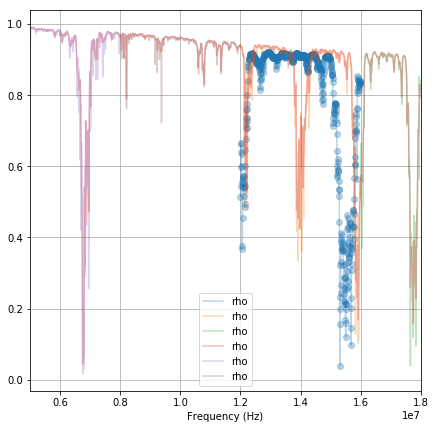

In [42]:
#df.assign(rho=df['Returnloss (dB)'])
dfs[0]['rho'] = 10**(df['Returnloss (dB)']/20)
ax1 = dfs[0].plot('Frequency (Hz)', 'rho', grid=True, kind='line',
                xlim=(1.6e7, 1.7e7), figsize=(7,7), marker='o', alpha=0.3);
for df in dfs:
    df['rho'] = 10**(df['Returnloss (dB)']/20)
    df.plot('Frequency (Hz)', 'rho', grid=True, kind='line', alpha=0.3, ax=ax1)

#plt.savefig('c:/Temp/rho of all.jpg')    

In [43]:
#rs = df['Rs (Ohm)'][df['Frequency (Hz)'] > 16e6]
low_threshold = 16.6e6
high_threshold = 16.8e6
below_resonance = df['Frequency (Hz)'] < low_threshold
above_resonance = df['Frequency (Hz)'] > high_threshold
Rs_below = df['Rs (Ohm)'][below_resonance]
Rs_above = df['Rs (Ohm)'][above_resonance]
Xs_below = df['Xs (Ohm)'][below_resonance]
Xs_above = df['Xs (Ohm)'][above_resonance]
over_16 = df['Frequency (Hz)'] > 16.6e6
under_17 = df['Frequency (Hz)'] < 16.8e6
between_16_17 = over_16 & under_17
Rs = df['Rs (Ohm)'][between_16_17]
#between_16_17
Xs = df['Xs (Ohm)'][between_16_17]

over_18 = df['Frequency (Hz)'] > 18e6
under_15 = df['Frequency (Hz)'] < 15e6
between_16_17 = over_16 & under_17

#Rs_above

In [44]:
from smithplot import SmithAxes
# plot data
plt.figure(figsize=(9, 9))

ax = plt.subplot(1, 1, 1, projection='smith')
#plt.plot(df['Rs (Ohm)'], df['Xs (Ohm)'], datatype=SmithAxes.Z_PARAMETER);
# plt.plot(Rs_above, Xs_above, datatype=SmithAxes.Z_PARAMETER);
#plt.plot(Rs_below, Xs_below, datatype=SmithAxes.Z_PARAMETER);
#plt.plot(Rs, Xs, datatype=SmithAxes.Z_PARAMETER);
#plt.plot(1+2j, datatype=SmithAxes.S_PARAMETER);
#plt.plot(100 - 75j, datatype=SmithAxes.Z_PARAMETER)

#plt.plot(df['Frequency (Hz)'].values, df['rho'].values, datatype=SmithAxes.S_PARAMETER)


plt.plot(df['Rs (Ohm)'][over_18], df['Xs (Ohm)'][over_18], datatype=SmithAxes.Z_PARAMETER);
plt.plot(df['Rs (Ohm)'][under_15], df['Xs (Ohm)'][under_15], datatype=SmithAxes.Z_PARAMETER);
# Series resonance is at 12.54M, df[161]
df.loc(16)
#df[0:170]
df[under_15][-3:]

,Frequency (Hz),Returnloss (dB),Returnphase (°),Rs (Ohm),SWR,Xs (Ohm),|Z| (Ohm),Theta,rho,phase (rads),s11
629,11980413,-0.55,-139.35,1.8,31.39,-18.5,18.6,-84.4,0.938642,-2.432116,(-0.712150633018-0.611465738124j)
630,11986742,-0.53,-139.68,1.7,32.88,-18.3,18.4,-84.6,0.940806,-2.437876,(-0.717310359427-0.608754021004j)
631,11993071,-0.53,-140.11,1.7,32.55,-18.1,18.2,-84.5,0.940806,-2.445381,(-0.721858763487-0.603353574124j)


IndexError: index 0 is out of bounds for axis 0 with size 0

##Some possibilities
Add series R of 47 with, in parallel, a series LC resonant at the self-resonance. This will modify the resonance and provide (approx) matching at other frequencies.

Match at a frequency away from the resonance.

Damp the resonance to make it more manageable.

Measure both over a wider frequency range (1..100MHz) and also narrower around the resonance (to get better resolution on behaviour there).

What reference plane was used for the measurements?

In [ ]:

from cmath import exp
def P2R(radii, angles):
    return radii * exp(1j*angles)
P2R(0.3, 3.14/2)

Tapped impedance transformer of 2 Cs and 1 L

$R_L = R_S \left(\frac{C_1 + C_2}{C_1}\right)^2$

The inductor should be close to its max value of

$L_{max} = \frac{R_L}{\omega \sqrt{\frac{R_L}{R_S} - 1}}$

In [ ]:
# Assume C1 = C2 then
Rl = 50 * 4
Rs = 50
w = 2 * 3.1415 * 16e6
Lmax = Rl/(w*(Rl/Rs - 1)**0.5)
Lmax

In [ ]:
16.88, 4.9, -41.5
w = 2 * 3.1415 * 16.88e6
Zstart = 4.98 -41.5j
Ypar = -2.525j/150
Zpar = 1 / Ypar
Yparpath = np.linspace(1/Zstart, 1/Zstart + Ypar, 20)
Zparpath = [1/Y for Y in Yparpath]
#Y = 1/Zstart + Ypar
#Zpar = 1/(Y)
Zser = 0 +2.45*50j
Zserpath = [Zparpath[-1] + Zstep for Zstep in np.linspace(0j, Zser, 20)]
#Zres = Zpar + 125*1.6j
plt.figure(figsize=(9, 9))
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([Zstart], datatype=SmithAxes.Z_PARAMETER);
plt.plot([Zparpath], datatype=SmithAxes.Z_PARAMETER);
plt.plot([Zserpath], datatype=SmithAxes.Z_PARAMETER);

Zparpath[-1], Zserpath[-1], 1e9 * Zpar / w, 1e9 * Zser / w

plt.title(
    'Matching at 16.88MHz, 560nH in parallel, 1.1uH in series' 
)
plt.savefig('c:/Temp/matched at 16M.jpg')

In [ ]:
df[df['Returnphase (°)']**2 < 1000]

In [ ]:
df[df['Xs (Ohm)']**2 < 0.01]

In [ ]:
# Series rlc response
SmithAxes.update_scParams({"grid.minor.enable": False})

Omegas = np.linspace(10e6, 20e6, 10) * 2 * 3.14159
R = 2.0
L = 290e-9
C = 465e-12
Xs = L * Omegas - 1/(C * Omegas)
Rs = np.ones(Omegas.shape) * R
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(Rs, Xs, datatype=SmithAxes.Z_PARAMETER);

In [ ]:
# Parallel lc in series with r response
SmithAxes.update_scParams({"grid.minor.enable": False})
Omegas = np.linspace(10e6, 20e6, 20) * 2 * 3.14159
R = 2.0 * 5
L = 290e-9
C = 465e-12
Xcs = -1/(C * Omegas)
Xls = L * Omegas
Xs = 1/(1/Xcs + 1/Xls)
Rs = np.ones(Omegas.shape) * R
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(Rs, Xs, datatype=SmithAxes.Z_PARAMETER);

In [ ]:
Omegas[3]/2/3.14


In [ ]:
pi = 3.14159
s_11 = 0.61*exp(1j * 90/180*pi);
# s_21 = 3.72*exp(j*59/180*pi);
# s_12 = 0.05*exp(j*42/180*pi);
# s_22 = 0.45*exp(j*(-48/180)*pi);
s_11

In [ ]:
import pylab
import scipy
import skrf

#ntwk = rf.Network('ring slot.s2p')
#ntwk.plot_s_smith()
#skrf.network.z2s(np.array([3 -14j]))
2*3.14159*20e6*3.7e-9
#26/180*3.14


In [ ]:
# Choose a Z somewhere around 12M (not from real data)
# call it 2 and -25
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([2 -25j], datatype=SmithAxes.Z_PARAMETER);
# adding resistance would move it towards the locus of 50ohms
plt.plot([2+48 -25j], datatype=SmithAxes.Z_PARAMETER);
# Now a little series L
plt.plot([2+48 -25j+25j], datatype=SmithAxes.Z_PARAMETER);

In [ ]:
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot([2 -25j], datatype=SmithAxes.Z_PARAMETER);
# This time add parallel L of 25R
Ylr = 1/(2-25j)
Ynewl = 1/31j
Yt = Ylr + Ynewl
plt.plot([1/Yt], datatype=SmithAxes.Z_PARAMETER);
# Now add series L of +2.5j denorm to 50
plt.plot([(0+115j)+(1/Yt)], datatype=SmithAxes.Z_PARAMETER);
# This is not a good transform - too sensitive to the 31j
# At 12M 31j is 31/w12
31 / (2 * np.pi * 12E6), 115 / (2 * np.pi * 12E6)


In [ ]:
1/(10e6*2*3.14159*14.1)

In [ ]:
15.4/(2*3.1415*15e6)

In [ ]:
10e6*2*3.1415*163e-9

In [ ]:
# starting with series model, calc l and c 
w1=2*3.1415*10e6
x1=-14.1  # @10M
w2=2*3.1415*15e6
x2=15.4  # @15M
c=(w1/w2**.5 - 1/w1) / (x1 - x2*w1/w2)
#c=(w2/w1**.5 - 1/w2) / (x2 - x1*w2/w1)
L = x2/w2 - 1/(c*w2**2)
res_w = (1/(L*c))**.5
res_f = 1 / ( 2 * 3.1415 * (L*c)**.5)
L*1e9, c*1e9, res_f*1e-6

In [ ]:
L*w1-1/(c*w1), L*w2-1/(c*w2), x1/w1 - 1/(c*w1**2)

In [ ]:
# presume xl is 30 at 15M 
1e9*30/w2
#318nH
# What is this at 10M
w1*(30/w2)
# 20
# so cap has to add -34 at 10M
1e9/(w1*34)
# 468pF
# What's the resonance?
1e-6/(2*3.14159*(318e-9*468e-12/2)**.5)
# 13M
# What's the Z at 10M
# wL - 1/wC
w1*318e-9 - 1/(w1*468e-12/2)
# -14
# and now at 15M
#w2*318e-9 - 1/(w2*468e-12/2)
# only 7.2!!

In [ ]:
dfcsv = pd.read_csv(r'C:\Temp\sawdx\Network Analyser\15-18MHz Data\VNA_171130_093055_16-18MHz.csv')
plt.figure(figsize=(9, 9)) 
ax = plt.subplot(1, 1, 1, projection='smith')
plt.plot(dfcsv['Rs'], dfcsv['Xs'], datatype=SmithAxes.Z_PARAMETER);
df = dfs[0]
plt.plot(df['Rs (Ohm)'], df['Xs (Ohm)'], datatype=SmithAxes.Z_PARAMETER);
#dfcsv['Xs']
plt.savefig('c:/Temp/sawdx/Smith of xls and csv.jpg')

NameError: name 'dfcsv' is not defined

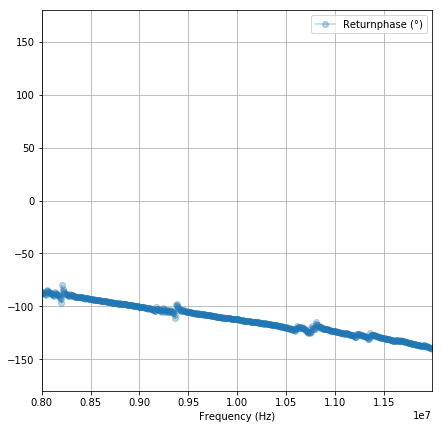

In [58]:
ax1 =  df.plot('Frequency (Hz)', 'Returnphase (°)', grid=True, kind='line',
               ylim=(-180, 180), figsize=(7,7),
               marker='o', alpha=0.3);

dfcsv.plot('Frequency(Hz)', 'Phase(deg)', grid=True, kind='line',
               ylim=(-180, 180), figsize=(7,7),
               marker='*', alpha=0.3, ax=ax1);

ax1.legend([filenames[0], 'VNA_171130_093055_16-18MHz.csv']);
plt.savefig('c:/Temp/sawdx/Phase of xls and csv.jpg')

NameError: name 'dfcsv' is not defined

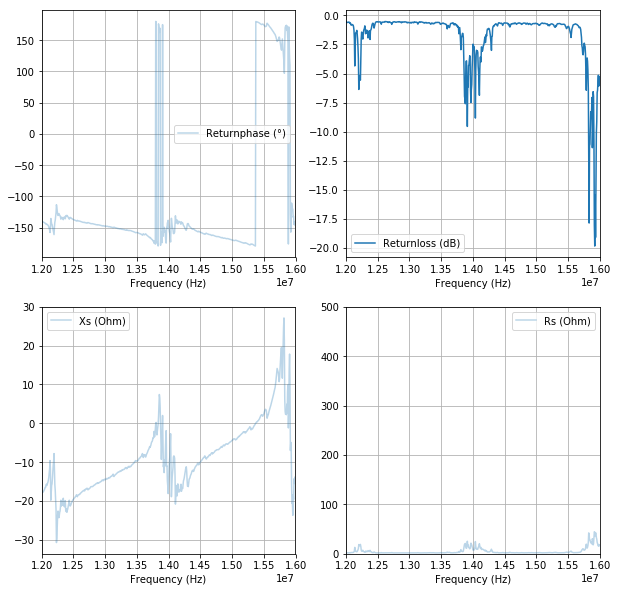

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1 = dfs[0].plot('Frequency (Hz)', 'Returnphase (°)', grid=True, kind='line', alpha=0.3, ax=axes[0,0])
ax2 = dfs[0].plot('Frequency (Hz)', 'Returnloss (dB)', grid=True, kind='line', ax=axes[0,1]);
ax3 = dfs[0].plot('Frequency (Hz)', 'Xs (Ohm)', grid=True, kind='line', alpha=0.3, ax=axes[1,0]);
ax4 = dfs[0].plot('Frequency (Hz)', 'Rs (Ohm)', grid=True, kind='line', ylim=(0, 500), alpha=0.3, ax=axes[1,1]);

dfcsv.plot('Frequency(Hz)', 'Phase(deg)', alpha=0.3, ax=ax1)
dfcsv.plot('Frequency(Hz)', 'Return Loss(dB)', grid=True, kind='line', alpha=0.3, ax=ax2);
dfcsv.plot('Frequency(Hz)', 'Xs', grid=True, kind='line', alpha=0.3, ax=ax3);
dfcsv.plot('Frequency(Hz)', 'Rs', grid=True, kind='line', ylim=(0, 500), alpha=0.3, ax=ax4);
plt.savefig('c:/Temp/sawdx/Graphs of xls and csv.jpg')